In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [26]:
# Set the ticker symbol for the S&P 500
ticker_symbol = "^GSPC"

# Calculate the date 10 years ago from today
twenty_yrs_ago = datetime.now() - timedelta(days=20 * 365)

# Create a yfinance Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical data
df = ticker.history(
    start=twenty_yrs_ago.strftime('%Y-%m-%d'),
    # period='max',
    interval="1d"
)
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df['PercentChange'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['NegChange'] = df['PercentChange'] < 0
df['NextDayNegChange'] = df['NegChange'].shift(1)

df.dropna(inplace=True)

In [27]:
df

,Open,High,Low,Close,PercentChange,NegChange,NextDayNegChange
Date,,,,,,,
2004-02-02 00:00:00-05:00,1131.130005,1142.449951,1127.869995,1135.260010,0.365122,False,True
2004-02-03 00:00:00-05:00,1135.260010,1137.439941,1131.329956,1136.030029,0.067828,False,False
2004-02-04 00:00:00-05:00,1136.030029,1136.030029,1124.739990,1126.520020,-0.837127,True,False
2004-02-05 00:00:00-05:00,1126.520020,1131.170044,1124.439941,1128.589966,0.183747,False,True
2004-02-06 00:00:00-05:00,1128.589966,1142.790039,1128.390015,1142.760010,1.255553,False,False
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,4796.279785,4842.069824,4785.870117,4839.810059,0.907584,False,False
2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,-0.061601,True,False
2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,0.160606,False,True


In [35]:
import matplotlib.pyplot as plt

# Your existing code to calculate probabilities
_range = range(1, 25)  # Adjust this range as needed
_stats = {}
_nd_stats = {}
n_days = len(df)

new_columns = {}

df = df.assign(**new_columns)

for n in _range:
    # Check for n consecutive days of negative change
    new_columns[f'{n}d_Neg∆'] = df['NegChange'].rolling(window=n).apply(lambda x: all(x), raw=False) #.astype(bool)

    # Check for n consecutive days of positive change
    new_columns[f'{n}d_Pos∆'] = (~df['NegChange']).rolling(window=n).apply(lambda x: all(x), raw=False) #.astype(bool)

    # Calculating the probability of a positive day following 'n' negative days
    _stats[f'P(Pos|{n}d_Neg)'] = (~df[new_columns[f'{n}d_Neg∆'].astype(bool)]['NextDayNegChange']).mean()

    # Calculating the probability of a negative day following 'n' positive days
    _stats[f'P(Neg|{n}d_Pos)'] = df[new_columns[f'{n}d_Pos∆'].astype(bool)]['NextDayNegChange'].mean()
    
    _nd_stats[f'{n}d'] = {
        'pos': sum(new_columns[f"{n}d_Pos∆"].dropna()),
        'neg': sum(new_columns[f"{n}d_Neg∆"].dropna())
    }
    
    n_nan = n - 1
    _n_days = n_days - n_nan
    _stats[f'P({n}d_Pos∆)'] = sum(new_columns[f'{n}d_Pos∆'].dropna()) / _n_days
    _stats[f'P({n}d_Neg∆)'] = sum(new_columns[f'{n}d_Neg∆'].dropna()) / _n_days

# Separate the positive and negative probabilities for plotting
pos_probs = [_stats[f'P({n}d_Pos∆)'] for n in _range]
neg_probs = [_stats[f'P({n}d_Neg∆)'] for n in _range]
labels = [f'{n} Days' for n in _range]

In [36]:
_nd_stats

{'1d': {'pos': 2735.0, 'neg': 2295.0},
 '2d': {'pos': 1434.0, 'neg': 995.0},
 '3d': {'pos': 745.0, 'neg': 420.0},
 '4d': {'pos': 377.0, 'neg': 170.0},
 '5d': {'pos': 182.0, 'neg': 66.0},
 '6d': {'pos': 86.0, 'neg': 24.0},
 '7d': {'pos': 40.0, 'neg': 9.0},
 '8d': {'pos': 18.0, 'neg': 4.0},
 '9d': {'pos': 7.0, 'neg': 2.0},
 '10d': {'pos': 2.0, 'neg': 1.0},
 '11d': {'pos': 1.0, 'neg': 0.0},
 '12d': {'pos': 0.0, 'neg': 0.0},
 '13d': {'pos': 0.0, 'neg': 0.0},
 '14d': {'pos': 0.0, 'neg': 0.0},
 '15d': {'pos': 0.0, 'neg': 0.0},
 '16d': {'pos': 0.0, 'neg': 0.0},
 '17d': {'pos': 0.0, 'neg': 0.0},
 '18d': {'pos': 0.0, 'neg': 0.0},
 '19d': {'pos': 0.0, 'neg': 0.0},
 '20d': {'pos': 0.0, 'neg': 0.0},
 '21d': {'pos': 0.0, 'neg': 0.0},
 '22d': {'pos': 0.0, 'neg': 0.0},
 '23d': {'pos': 0.0, 'neg': 0.0},
 '24d': {'pos': 0.0, 'neg': 0.0}}

<Axes: >

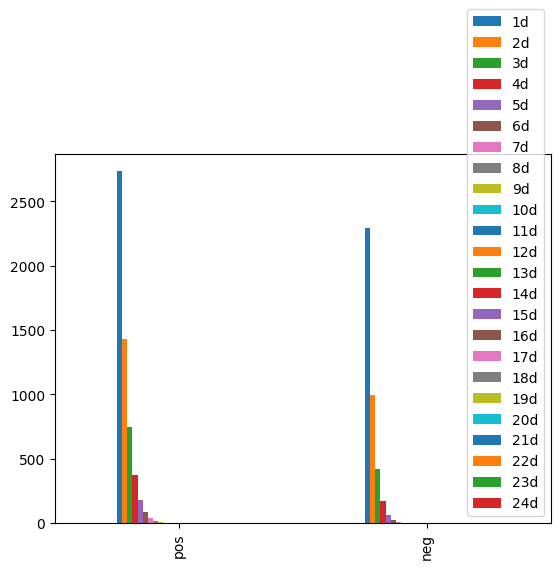

In [37]:
nd_df = pd.DataFrame(_nd_stats)

nd_df.plot(kind='bar')

In [38]:
nd_df

,1d,2d,3d,4d,5d,6d,7d,8d,9d,10d,...,15d,16d,17d,18d,19d,20d,21d,22d,23d,24d
pos,2735.0,1434.0,745.0,377.0,182.0,86.0,40.0,18.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neg,2295.0,995.0,420.0,170.0,66.0,24.0,9.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
pd.DataFrame(new_columns)

,1d_Neg∆,1d_Pos∆,2d_Neg∆,2d_Pos∆,3d_Neg∆,3d_Pos∆,4d_Neg∆,4d_Pos∆,5d_Neg∆,5d_Pos∆,...,46d_Neg∆,46d_Pos∆,47d_Neg∆,47d_Pos∆,48d_Neg∆,48d_Pos∆,49d_Neg∆,49d_Pos∆,50d_Neg∆,50d_Pos∆
Date,,,,,,,,,,,,,,,,,,,,,
2004-02-02 00:00:00-05:00,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-03 00:00:00-05:00,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-04 00:00:00-05:00,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-05 00:00:00-05:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-06 00:00:00-05:00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19 00:00:00-05:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-22 00:00:00-05:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-23 00:00:00-05:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


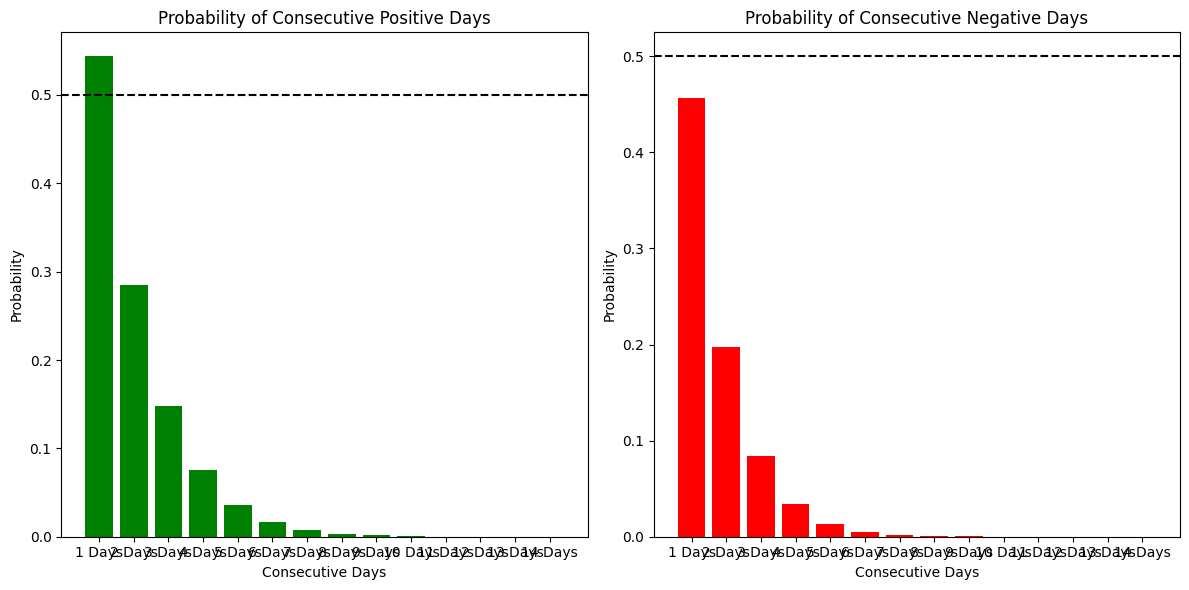

In [21]:
# Create bar charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positive changes
ax[0].bar(labels, pos_probs, color='green')
ax[0].set_title('Probability of Consecutive Positive Days')
ax[0].set_xlabel('Consecutive Days')
ax[0].set_ylabel('Probability')
ax[0].axhline(y=.5, color='black', linestyle='--')

# Plot for negative changes
ax[1].bar(labels, neg_probs, color='red')
ax[1].set_title('Probability of Consecutive Negative Days')
ax[1].set_xlabel('Consecutive Days')
ax[1].set_ylabel('Probability')
ax[1].axhline(y=.5, color='black', linestyle='--')


plt.tight_layout()
plt.show()


In [22]:
_stats

{'P(Pos|1d_Neg)': -1.4335511982570806,
 'P(Neg|1d_Pos)': 0.4756855575868373,
 'P(1d_Pos∆)': 0.5437375745526839,
 'P(1d_Neg∆)': 0.4562624254473161,
 'P(Pos|2d_Neg)': -2.0,
 'P(Neg|2d_Pos)': 0.0006968641114982578,
 'P(2d_Pos∆)': 0.28514615231656393,
 'P(2d_Neg∆)': 0.19785245575661164,
 'P(Pos|3d_Neg)': -1.9976303317535544,
 'P(Neg|3d_Pos)': 0.0013386880856760374,
 'P(3d_Pos∆)': 0.14817024661893397,
 'P(3d_Neg∆)': 0.08353221957040573,
 'P(Pos|4d_Neg)': -1.9942196531791907,
 'P(Neg|4d_Pos)': 0.005263157894736842,
 'P(4d_Pos∆)': 0.07499502685498309,
 'P(4d_Neg∆)': 0.033817386114979114,
 'P(Pos|5d_Neg)': -1.9714285714285715,
 'P(Neg|5d_Pos)': 0.010752688172043012,
 'P(5d_Pos∆)': 0.036211699164345405,
 'P(5d_Neg∆)': 0.013131715081575806,
 'P(Pos|6d_Neg)': -1.896551724137931,
 'P(Neg|6d_Pos)': 0.02197802197802198,
 'P(6d_Pos∆)': 0.01711442786069652,
 'P(6d_Neg∆)': 0.004776119402985075,
 'P(Pos|7d_Neg)': -1.8,
 'P(Neg|7d_Pos)': 0.06521739130434782,
 'P(7d_Pos∆)': 0.007961783439490446,
 'P(7d_Ne

In [23]:
# Preparing data for plotting
pos_after_neg_probs = [_stats.get(f'P(Pos|{n}d_Neg)', 0) for n in _range]
neg_after_pos_probs = [_stats.get(f'P(Neg|{n}d_Pos)', 0) for n in _range]
labels = [f'{n} Days' for n in _range]

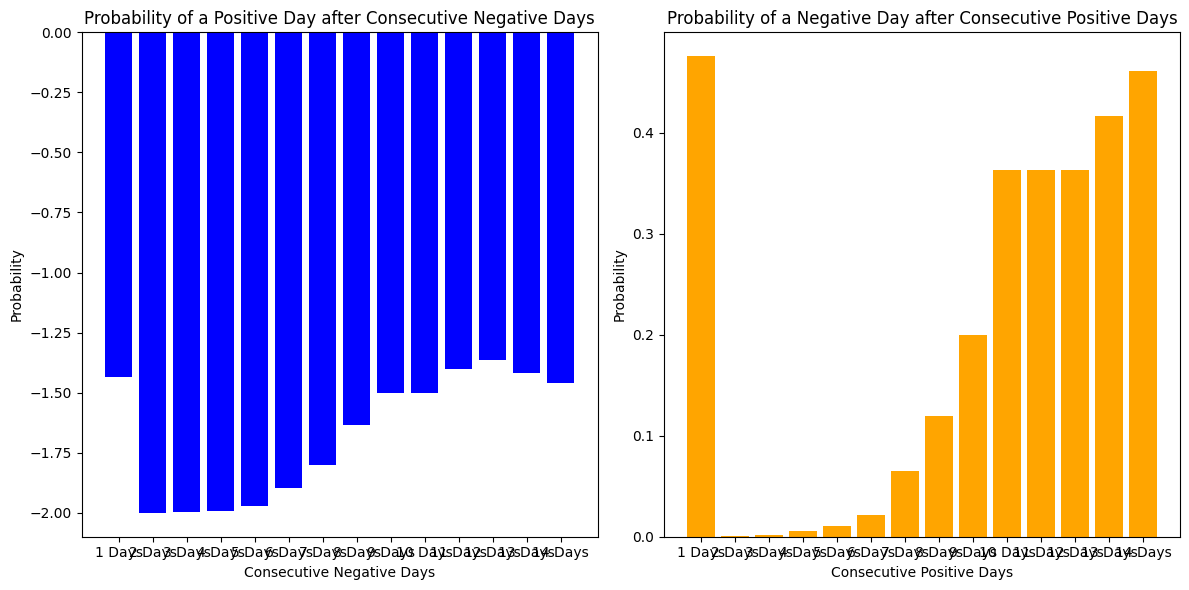

In [24]:
# Plotting the probabilities
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positive days after negative sequences
ax[0].bar(labels, pos_after_neg_probs, color='blue')
ax[0].set_title('Probability of a Positive Day after Consecutive Negative Days')
ax[0].set_xlabel('Consecutive Negative Days')
ax[0].set_ylabel('Probability')
# ax[0].axhline(y=0.5, color='black', linestyle='--')

# Plot for negative days after positive sequences
ax[1].bar(labels, neg_after_pos_probs, color='orange')
ax[1].set_title('Probability of a Negative Day after Consecutive Positive Days')
ax[1].set_xlabel('Consecutive Positive Days')
ax[1].set_ylabel('Probability')
# ax[1].axhline(y=0.5, color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [48]:
import pandas as pd

# Example DataFrame df
# df = pd.DataFrame({'NegChange': [...]})  # Your DataFrame with the 'NegChange' column

_range = range(1, 5)  # Adjust this range as needed
stats = {}
n_days = len(df)

for n in _range:
    # Identifying sequences of 'n' consecutive negative days
    df[f'{n}d_Neg_Seq'] = df['NegChange'].rolling(window=n).apply(lambda x: all(x), raw=False)

    # Calculating the probability of a positive day following 'n' negative days
    # Shift the negative sequence to align with the day following the sequence
    following_day_is_positive = ~df['NegChange'].shift(-n)
    stats[f'P(Pos|{n}d_Neg)'] = (df[f'{n}d_Neg_Seq'] & following_day_is_positive).sum() / df[f'{n}d_Neg_Seq'].sum()

# Output the calculated probabilities
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [39]:
for i in _range:
    print(all(df[f'{i}d_Neg_Seq'] == df[f'{i}d_Neg∆']))

True
True
True
True
